In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [92]:
# !wget https://raw.githubusercontent.com/devdio/datasets/main/diabetes.csv

In [93]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [94]:
df.shape

(768, 9)

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Train Test Split

In [96]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)

X_train_s

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [99]:
y_train = y_train.values
y_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

## Model

In [100]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(units=8, activation='relu', input_shape=(8,)),
    layers.Dense(units=6, activation='relu',),
    layers.Dense(units=3, activation='relu',),
    layers.Dense(units=1)
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 8)                 72        
                                                                 
 dense_18 (Dense)            (None, 6)                 54        
                                                                 
 dense_19 (Dense)            (None, 3)                 21        
                                                                 
 dense_20 (Dense)            (None, 1)                 4         
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
model.compile(
    loss = "binary_crossentropy",
    optimizer="adam",
    metrics=["mse", "mae", "accuracy"]
)

In [102]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(
    X_train_s, y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split=0.2,
    verbose = 1
)

Epoch 1/100
31/31 [==============================] - 2s 16ms/step - loss: 3.4245 - mse: 0.3877 - mae: 0.4280 - accuracy: 0.6477 - val_loss: 3.4203 - val_mse: 0.4255 - val_mae: 0.4681 - val_accuracy: 0.5854
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 2.6899 - mse: 0.3586 - mae: 0.4120 - accuracy: 0.6375 - val_loss: 2.8125 - val_mse: 0.3970 - val_mae: 0.4571 - val_accuracy: 0.5610
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 2.3534 - mse: 0.3324 - mae: 0.4027 - accuracy: 0.6395 - val_loss: 2.2541 - val_mse: 0.3670 - val_mae: 0.4457 - val_accuracy: 0.5691
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 2.0322 - mse: 0.3144 - mae: 0.3973 - accuracy: 0.6375 - val_loss: 2.0878 - val_mse: 0.3494 - val_mae: 0.4392 - val_accuracy: 0.5772
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 1.8616 - mse: 0.3006 - mae: 0.3937 - accuracy: 0.6415 - val_loss: 2.0221 - val_mse: 0.3349 - val_mae: 0.43

In [103]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize = (16,8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()

    plt.show()

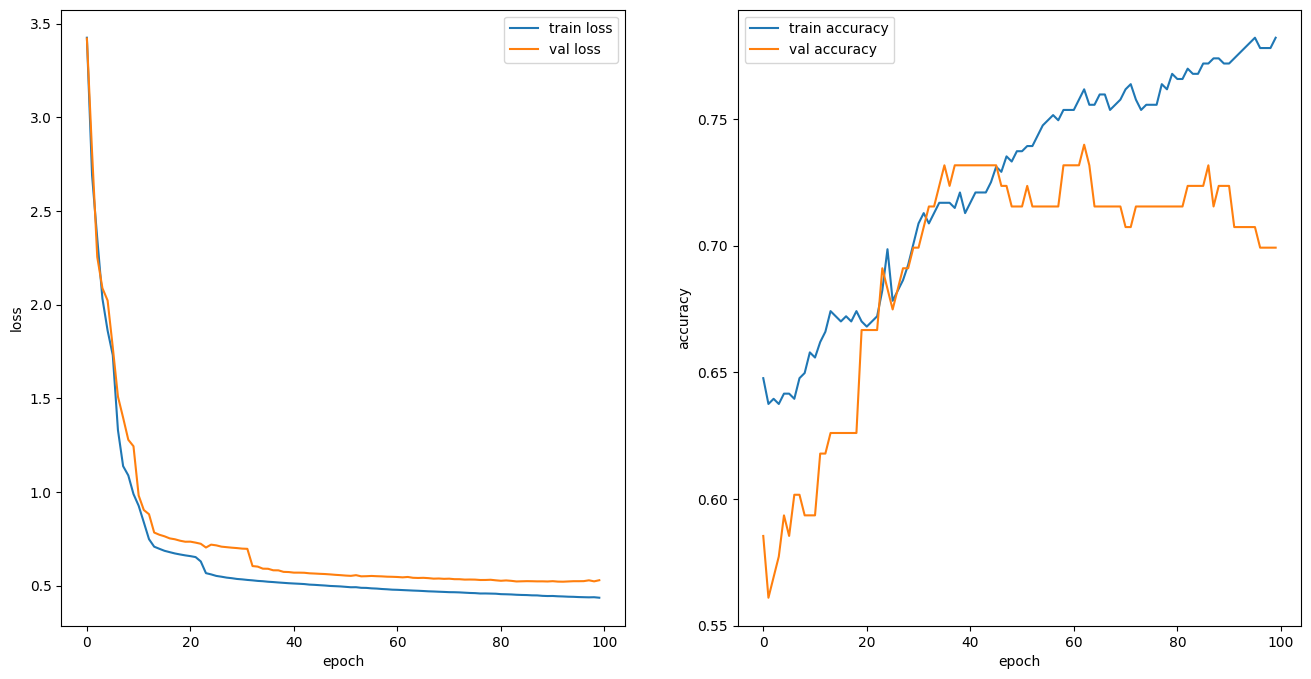

In [104]:
plot_history(history)

In [109]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [110]:
y_pred = model.predict(X_test_s)
y_pred = y_pred.reshape(-1)
y_pred

5/5 [==============================] - 0s 2ms/step


array([0.6376926 , 0.1833649 , 0.00571347, 0.30595315, 0.55096716,
       0.74881136, 0.00571347, 0.2428353 , 0.5388463 , 0.62728846,
       0.23780094, 0.5438898 , 0.41431355, 0.64462376, 0.00571347,
       0.27686393, 0.1621211 , 0.00571347, 0.5001986 , 0.53178746,
       0.34113497, 0.00571347, 0.33935255, 0.00571347, 0.4612069 ,
       0.603403  , 0.14114325, 0.00571347, 0.05355102, 0.11484423,
       0.8017988 , 0.7010537 , 0.6823417 , 0.29161552, 0.8546242 ,
       0.6538618 , 0.840961  , 0.7056521 , 0.4663363 , 0.3652708 ,
       0.01592862, 0.671425  , 0.6461546 , 0.27461803, 0.08654456,
       0.51888824, 0.58153385, 0.17764932, 0.62018126, 1.2205055 ,
       0.00571347, 0.70149195, 0.8220209 , 0.12190903, 0.12353714,
       0.00571347, 0.5596758 , 0.00571347, 0.35367024, 0.5926024 ,
       0.566132  , 0.3470539 , 0.66503894, 0.34525704, 0.00571347,
       0.6574222 , 0.00571347, 0.5159374 , 0.00571347, 0.6037122 ,
       0.84494716, 0.14470333, 0.33686596, 0.1114703 , 0.05303

In [119]:
y_pred = (y_pred > 0.5).astype('int')
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [115]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7012987012987013